In [1]:
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import os
import glob
import sys

In [2]:
from utils import set_basepath

In [3]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data/notebooks/feature'

In [4]:
basepath = set_basepath(steps=2)

In [5]:
sys.path[0]

'/Users/jacobhow/Documents/programming-projects/nfl-big-data'

In [6]:
from src.team import Team
from src.game import Game
from src.play import Play
from src.player import Player
from src.analysis import process_games

In [7]:
games = pd.read_csv(os.path.join(basepath,'data/games.csv'))

In [8]:
players = pd.read_csv(os.path.join(basepath,'data/players.csv')).set_index('nflId')

In [9]:
plays = pd.read_csv(os.path.join(basepath,'data/plays.csv'))

In [10]:
weeks = {}
for i in range(1):
    name = f'week{i+1}'
    weeks[name] = pd.read_csv(os.path.join(basepath,'data',name+'-processed.csv'))

In [11]:
teams = process_games(games,plays)

In [12]:
team = teams['IND']

In [13]:
team.games

{'week1': <src.game.Game at 0x12d28fe10>,
 'week2': <src.game.Game at 0x12d2aac88>,
 'week3': <src.game.Game at 0x12d2c89e8>,
 'week4': <src.game.Game at 0x10aef67f0>,
 'week5': <src.game.Game at 0x10af0c748>,
 'week6': <src.game.Game at 0x10bd054a8>,
 'week7': <src.game.Game at 0x10bd0ed30>,
 'week8': <src.game.Game at 0x11e1bb4a8>,
 'week10': <src.game.Game at 0x11e1e22b0>,
 'week11': <src.game.Game at 0x11e1f47f0>,
 'week12': <src.game.Game at 0x11e204d30>,
 'week13': <src.game.Game at 0x11e21ff28>,
 'week14': <src.game.Game at 0x11e238208>,
 'week15': <src.game.Game at 0x11e24bfd0>,
 'week16': <src.game.Game at 0x11e25d550>,
 'week17': <src.game.Game at 0x11f0404a8>}

In [14]:
team.process_weeks(weeks)

week1


/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance from line'] = self.player_tracking['x'] - self.line_of_scrimmage
/Users/jacobhow/Documents/programming-projects/nfl-big-data/src/play.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.player_tracking['distance to sideline'] = [min((160/3) - y,y) for y in self.player_tracking['y'].values]
/Users/jacobhow/Documents/programming-projects/nfl-big-data/

week2
week3


In [15]:
game = team.games['week2']
game.list_plays()

Play 1: (8:42) (Shotgun) A.Smith pass short left to A.Peterson to IND 44 for 6 yards (D.Leonard).
Play 2: (7:20) (Shotgun) A.Smith pass short middle to P.Richardson to IND 44 for 1 yard (D.Leonard).
Play 3: (4:58) (Shotgun) A.Smith pass short left to A.Peterson ran ob at WAS 41 for 3 yards.
Play 4: (2:33) A.Smith pass incomplete deep left to J.Doctson.
Play 5: (13:09) A.Smith pass short right to A.Peterson pushed ob at IND 37 for 21 yards (N.Hairston). WAS-B.Scherff was injured during the play. His return is Questionable.  75 - has a right knee injury
Play 6: (12:29) A.Smith sacked at IND 39 for -7 yards (J.Sheard).
Play 7: (11:21) (Shotgun) A.Smith pass incomplete short middle to J.Doctson (J.Sheard).
Play 8: (6:14) (Shotgun) A.Smith pass short right to J.Reed to WAS 29 for 4 yards (D.Leonard).
Play 9: (5:39) (Shotgun) A.Smith pass incomplete deep middle to P.Richardson (M.Farley).
Play 10: (3:44) (Shotgun) A.Smith pass short right to C.Thompson to WAS 37 for 8 yards (D.Leonard).
Play

In [16]:
game.process_plays(players)

In [17]:
play_number = 20

In [18]:
play = game.plays[play_number - 1]

In [19]:
play.play_data

gameId                                                           2018091608
playId                                                                 2447
playDescription           (12:08) (Shotgun) A.Smith pass deep right to P...
quarter                                                                   3
down                                                                      2
yardsToGo                                                                10
possessionTeam                                                          WAS
playType                                                     play_type_pass
yardlineSide                                                            WAS
yardlineNumber                                                           23
offenseFormation                                                    SHOTGUN
personnelO                                                 1 RB, 1 TE, 3 WR
defendersInTheBox                                                         6
numberOfPass

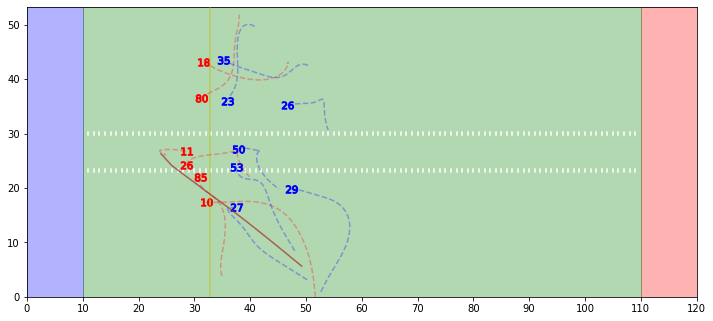

In [20]:
play.plot_play(markers='number')

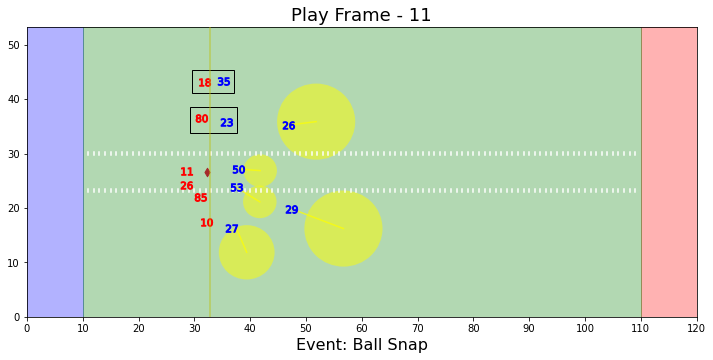

In [21]:
play.plot_play_frame(index='ball_snap',show_coverage=True,markers='number')

In [22]:
play.events

{'ball_snap': 11,
 'pass_forward': 39,
 'pass_arrived': 54,
 'pass_outcome_caught': 57,
 'out_of_bounds': 61,
 'peak_dropback': 24,
 'end_dropback': 32}

In [23]:
cb = play.return_player_by_number(23)

In [24]:
print(cb)

Kenny Moore II


In [25]:
cb.safety_help

True

In [26]:
cb.coverage

'man'

In [27]:
cb.coverage=='man'

True

In [28]:
game.classify_defensive_back_coverages()

385
Nate Hairston
man
False
430
Pierre Desir
man
True
430
Nate Hairston
man
True
430
Kenny Moore II
man
True
430
Clayton Geathers
man
True
430
Matthias Farley
man
False
996
Nate Hairston
man
False
996
Kenny Moore II
man
True
1471
Quincy Wilson
man
False
1748
Pierre Desir
man
True
1832
Nate Hairston
man
False
1877
Kenny Moore II
man
True
2142
Pierre Desir
man
False
2142
Nate Hairston
man
True
2142
Kenny Moore II
man
False
2142
Clayton Geathers
man
False
2183
Nate Hairston
man
False
2402
Kenny Moore II
man
True
2447
Pierre Desir
man
True
2447
Kenny Moore II
man
True
2492
Pierre Desir
man
False
2492
Nate Hairston
man
False
2492
Kenny Moore II
man
False
2514
Pierre Desir
man
False
2514
Clayton Geathers
man
True
2754
Pierre Desir
man
False
2754
Nate Hairston
man
False
2754
Kenny Moore II
man
False
2754
Clayton Geathers
man
False
2928
Quincy Wilson
man
False
2928
Nate Hairston
man
False
2994
Quincy Wilson
man
True
3039
Quincy Wilson
man
False
3039
Kenny Moore II
man
True
3039
Darius Leonard


{'Pierre Desir': {'snaps': 38,
  'zone': 1,
  'zone-deep': 7,
  'zone-over': 13,
  'man': 9,
  'man-over': 8,
  'blitz': 0},
 'Nate Hairston': {'snaps': 44,
  'zone': 2,
  'zone-deep': 4,
  'zone-over': 17,
  'man': 12,
  'man-over': 9,
  'blitz': 0},
 'Kenny Moore II': {'snaps': 44,
  'zone': 1,
  'zone-deep': 1,
  'zone-over': 24,
  'man': 3,
  'man-over': 14,
  'blitz': 1},
 'Darius Leonard': {'snaps': 44,
  'zone': 1,
  'zone-deep': 0,
  'zone-over': 39,
  'man': 1,
  'man-over': 0,
  'blitz': 3},
 'Anthony Walker': {'snaps': 19,
  'zone': 1,
  'zone-deep': 2,
  'zone-over': 16,
  'man': 0,
  'man-over': 0,
  'blitz': 0},
 'Clayton Geathers': {'snaps': 44,
  'zone': 3,
  'zone-deep': 16,
  'zone-over': 21,
  'man': 2,
  'man-over': 2,
  'blitz': 0},
 'Malik Hooker': {'snaps': 44,
  'zone': 1,
  'zone-deep': 43,
  'zone-over': 0,
  'man': 0,
  'man-over': 0,
  'blitz': 0},
 'Matthias Farley': {'snaps': 22,
  'zone': 4,
  'zone-deep': 16,
  'zone-over': 1,
  'man': 1,
  'man-over': 0